In [432]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [369]:
df_main = pd.read_csv('police_deaths_in_america.csv')
df_root = df_main[(df_main['K9_Unit']!=1) & (df_main['State']!='United States')]
# df_root = df_main[df_main['State']!='United States']
df_root

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0
5,Sheriff,Robert Maxwell,Gunfire,"Sunday, November 12, 1797",1797,November,Sunday,"Washington District Sheriff's Office, SC",South Carolina,0
6,Superintendent,Hilary Baker,Duty related illness,"Tuesday, September 25, 1798",1798,September,Tuesday,"Philadelphia Police Department, PA",Pennsylvania,0
7,High Sheriff,John Caldwell Cook,Gunfire,"Tuesday, October 16, 1804",1804,October,Tuesday,"Mecklenburg County Sheriff's Office, NC",North Carolina,0
8,Watchman,Christian Luswanger,Stabbed,"Thursday, December 25, 1806",1806,December,Thursday,"New York City Night Watch, NY",New York,0
9,Deputy Sheriff,John A. Gooch,Gunfire,"Saturday, March 7, 1807",1807,March,Saturday,"Livingston County Sheriff's Department, KY",Kentucky,0
10,Deputy Sheriff,Ebenezer Parker,Assault,"Monday, January 18, 1808",1808,January,Monday,"Cumberland County Sheriff's Office, ME",Maine,0


In [370]:
df_na = df_root.isna().sum()
df_na

Rank              0
Name              0
Cause_of_Death    0
Date              0
Year              0
Month             0
Day               0
Department        0
State             0
K9_Unit           0
dtype: int64

In [371]:
df_state_non_US = df_root[df_root['State']!='United States']
df_state_cnt = df_state_non_US.groupby('State').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})

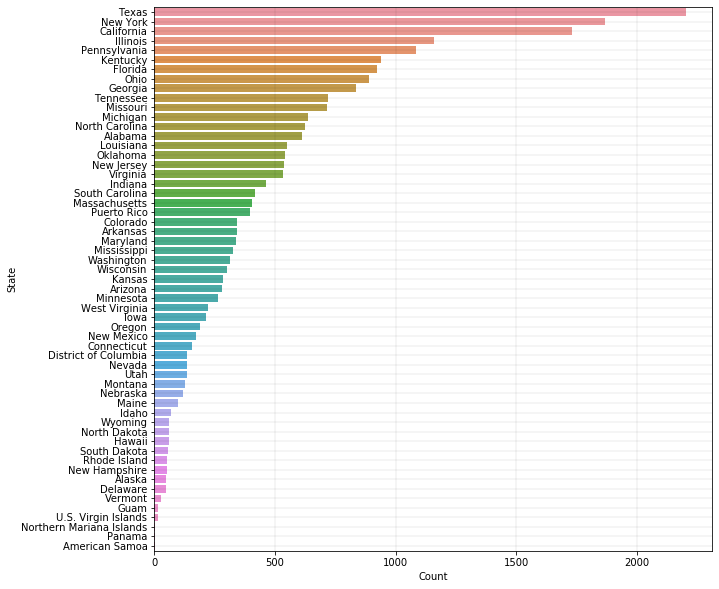

In [372]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=df_state_cnt['Count'], y=df_state_cnt['State'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

##### Texas has the highest number of Police deaths, followed by New York

In [373]:
df_top_5_states = df_state_cnt.head()

<function matplotlib.pyplot.show(*args, **kw)>

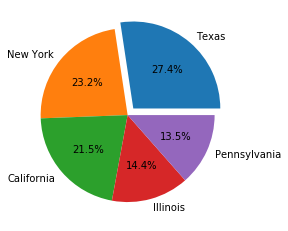

In [374]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(x=df_top_5_states['Count'], labels=df_top_5_states['State'], explode=explode, autopct='%0.1f%%')
plt.show

##### Texas has the highest number of deaths at a percentage share of 27.4%

In [375]:
# df_texas_dept = df_texas.groupby('Department').count().sort_values(by='Rank', ascending=False).reset_index()
# df_texas_top_5_dept = df_texas_dept.head()
df_texas = df_root[df_root['State']=='Texas']

In [376]:
df_texas_dept = df_texas.groupby('Department').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
df_texas_top_5_dept = df_texas_dept.head()

<function matplotlib.pyplot.show(*args, **kw)>

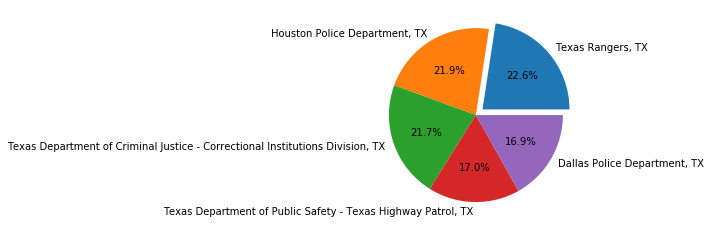

In [377]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(x=df_texas_top_5_dept['Count'], labels=df_texas_top_5_dept['Department'], explode=explode, autopct='%0.1f%%')
plt.show

##### Texas Rangers Dept has the highest number of deaths, closely followed by Houston Police Dept

In [378]:
df_texas_reason = df_texas.groupby('Cause_of_Death').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'})
df_texas_top_5_reasons = df_texas_reason.head()

<function matplotlib.pyplot.show(*args, **kw)>

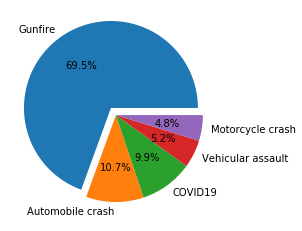

In [379]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(x=df_texas_top_5_reasons['Count'], labels=df_texas_top_5_reasons['Cause_of_Death'], explode=explode, autopct='%0.1f%%')
plt.show

###### Gunfire contributed to 69.5% of police deaths in Texas

In [380]:
df_highest_deaths = df_root.groupby('Year').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
df_highest_top_5_deaths = df_highest_deaths.head()

<function matplotlib.pyplot.show(*args, **kw)>

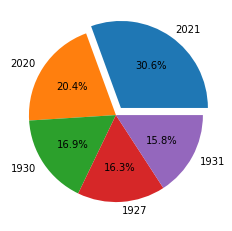

In [381]:
# plt.bar(df_highest_top_5_deaths['Year'], df_highest_top_5_deaths['Count'])
explode=[0.1, 0, 0, 0, 0]
plt.pie(x=df_highest_top_5_deaths['Count'], labels=df_highest_top_5_deaths['Year'], explode=explode, autopct='%0.1f%%')
plt.show

###### Highest deaths occured in 2021, followed by 2020

In [382]:
covid_yrs = ['2020', '2021']
df_21_20 = df_root[df_root['Year'].isin(covid_yrs)]

In [383]:
df_covid_reason = df_21_20.groupby(by=df_21_20['Cause_of_Death'])
df_covid_reason = df_covid_reason.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})

In [384]:
df_covid_911 = (df_21_20[df_21_20['Cause_of_Death']==r'9/11 related illness'].count()/len(df_21_20))*100
df_covid_911

Rank              3.400638
Name              3.400638
Cause_of_Death    3.400638
Date              3.400638
Year              3.400638
Month             3.400638
Day               3.400638
Department        3.400638
State             3.400638
K9_Unit           3.400638
dtype: float64

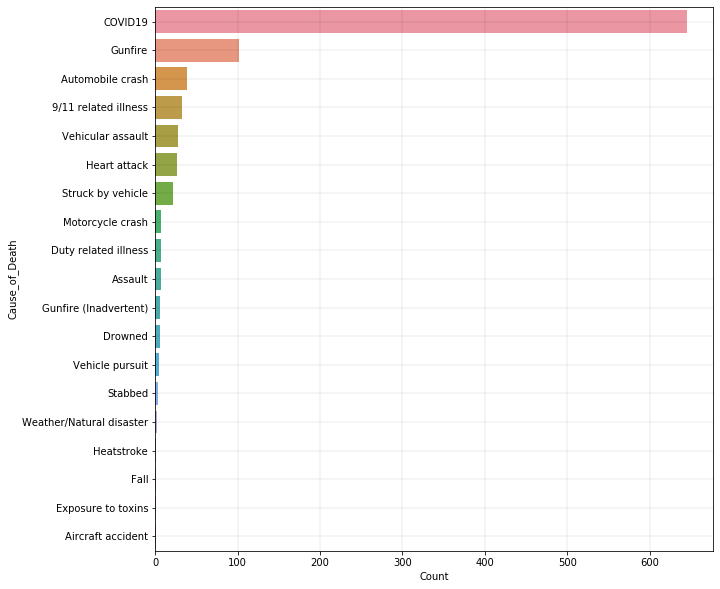

In [385]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=df_covid_reason['Count'], y=df_covid_reason['Cause_of_Death'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

##### Major police deaths in 2020 and 2021 are caused by Covid-19, connotating the frontline work did by the police during the crisis.
##### It is worth noting that there are deaths reported due to 9/11 related illness even after a decade of the incident, reporting around 32 deaths (3.4% contribution) in 2020 and 2021 combined. It is also worth noting that 9/11 related illess stands at 4th place beating Heart Attack during this timeframe.

In [386]:
accident = ['Automobile crash', 'Struck by vehicle', 'Motorcycle crash', 'Vehicle pursuit', 'Training accident', 'Aircraft accident']
df_accidents = df_root[df_root['Cause_of_Death'].isin(accident)]
df_accidents = df_accidents.groupby('Cause_of_Death')
df_accidents = df_accidents.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})

In [387]:
df_accidents_pct = ((df_accidents.iloc[0,1])/df_accidents['Count'].sum())*100
df_accidents_pct

43.31174838112858

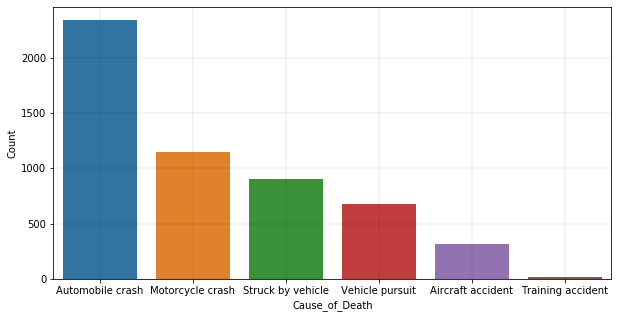

In [388]:
plt.figure(figsize=(10, 5))
# plt.bar(x=df_accidents['Cause_of_Death'], height=df_accidents['Count'])
ax = sns.barplot(x=df_accidents['Cause_of_Death'], y=df_accidents['Count'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

##### Among the various accident categories, Automobile crash with 43%, contributed to major police deaths. The prima facie reason could be that the major automobile crashes, perhaps, have occurred during the chases made.

In [389]:
df_terror = df_root[df_root['Cause_of_Death']=='Terrorist attack']

In [390]:
df_terror_1 = df_terror.groupby('Cause_of_Death').size()
df_terror_1

Cause_of_Death
Terrorist attack    70
dtype: int64

In [391]:
df_sep = df_root[(df_root['Year']==2001) & (df_root['Month']=='September') & (df_root['Cause_of_Death']=='Terrorist attack')]
df_sep11 = df_sep.groupby('Cause_of_Death').size()
df_sep11

Cause_of_Death
Terrorist attack    69
dtype: int64

In [392]:
df_sep_state = df_sep.groupby('State').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'})
df_sep_state

,State,Count
0,New York,69


In [393]:
main_state = (df_sep_state.iloc[0,1]/df_sep_state['Count'].sum())*100
main_state

100.0

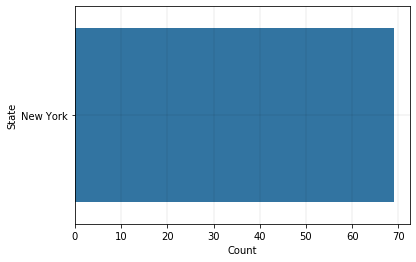

In [394]:
ax = sns.barplot(x=df_sep_state['Count'], y=df_sep_state['State'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

##### In the month of September 2001 (9/11 attack month), 69 police deaths have occurred due to the Terrorist attack, all in New York, where the WTO was grounded.

In [395]:
df_t = df_root[(df_root['Year']==2001) & (df_root['Cause_of_Death']=='Terrorist attack')]
df_tr = df_t.groupby('Cause_of_Death').size()
# df_tr

In [396]:
df_root['Date'] = pd.to_datetime(df_root['Date'])
df_root['Date_1'] = df_root['Date'].dt.date
# df_root.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [397]:
df_ground0 = df_root[df_root['Date_1'] == datetime.date(2001, 9, 11)]
# df_ground0

In [398]:
df_ground0_size = df_ground0.groupby('Date_1').size()
# df_ground0_size

In [399]:
df_ground0_rank = df_ground0.groupby('Rank').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
# df_ground0_rank

<function matplotlib.pyplot.show(*args, **kw)>

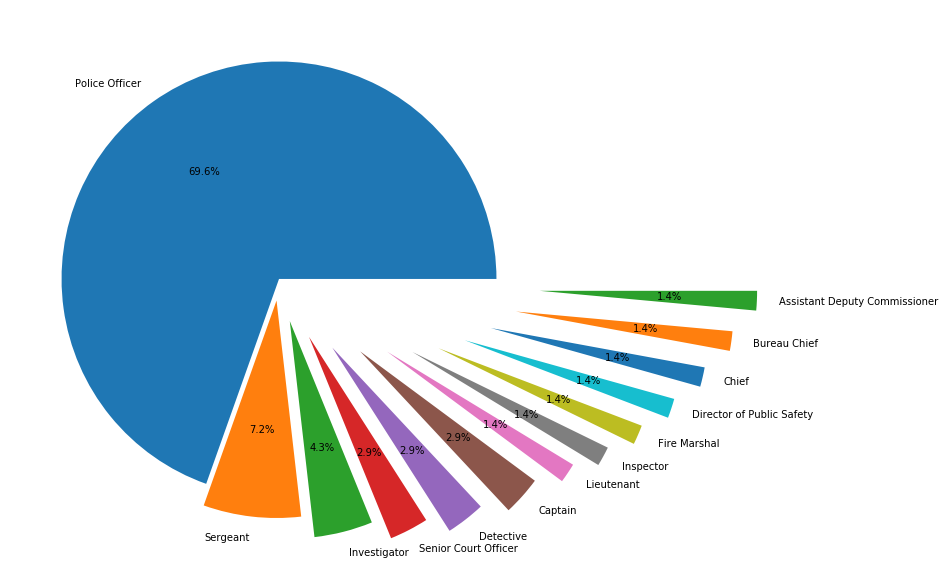

In [400]:
ln = len(df_ground0_rank)
explode = [i*0.1 for i in range(ln)]
plt.figure(figsize=(10,10))
plt.pie(x=df_ground0_rank['Count'], labels=df_ground0_rank['Rank'], explode=explode, autopct='%0.1f%%')
plt.show

##### 69 deaths occurred on the day of 11-Sep-2001. Police Officers (69.6%) suffered the most

In [401]:
df_day = df_root.groupby('Day')
df_day = df_day.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})

<function matplotlib.pyplot.show(*args, **kw)>

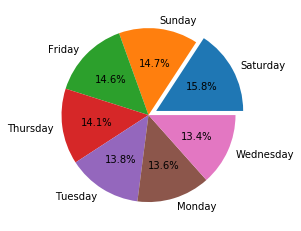

In [402]:
l = len(df_day)
explode = [0.1 if i==0 else 0 for i in range(l)]
plt.pie(x=df_day['Count'],labels=df_day['Day'], explode=explode, autopct='%0.1f%%')
plt.show

In [403]:
most_day = df_day.iloc[0]
second_most_day = df_day.iloc[1]

In [404]:
most_days_state = df_root[df_root['Day']==most_day['Day']]
most_days_state = most_days_state.groupby('State')
most_days_state = most_days_state.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})

In [405]:
l = len(most_days_state)
max_state = (most_days_state.iloc[0, 1]/most_days_state['Count'].sum())*100
min_state = (most_days_state.iloc[(l)-1, 1]/most_days_state['Count'].sum())*100
max_state, min_state

(9.441489361702128, 0.026595744680851064)

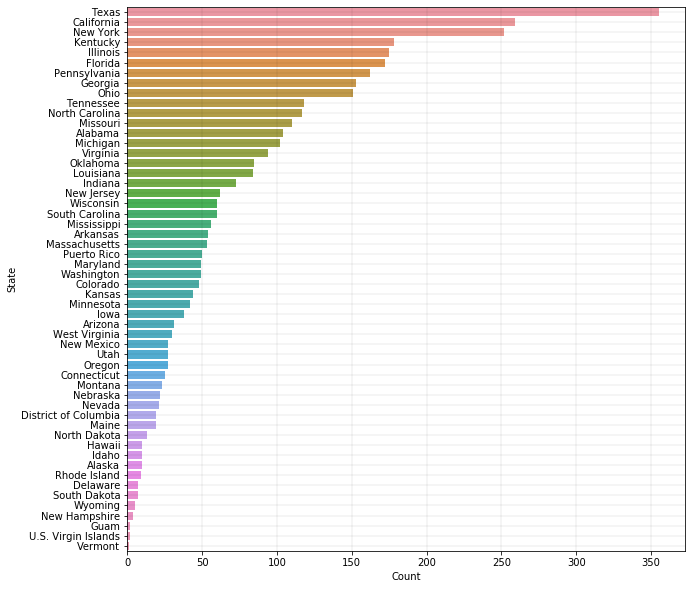

In [406]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=most_days_state['Count'], y=most_days_state['State'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

##### Texas marked the highest police deaths on Saturdays (9.4% of the total deaths reported) , while Vermont marked the least(0.02%) of the total deaths reported

In [407]:
df_months = df_root.groupby('Month')
df_month_pie = df_months.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
df_month_pie

,Month,Count
0,September,2229
1,December,2182
2,August,2167
3,July,2150
4,October,2001
5,November,1965
6,January,1958
7,May,1956
8,April,1883
9,June,1875


<function matplotlib.pyplot.show(*args, **kw)>

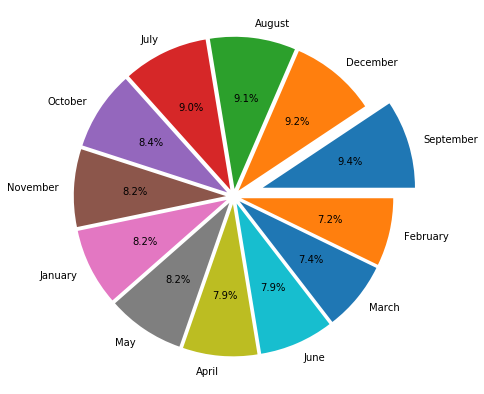

In [408]:
l = len(df_months)
explode = [0.2 if i==0 else 0.05 for i in range(l)]
plt.figure(figsize=(7, 7))
plt.pie(x=df_month_pie['Count'], labels=df_month_pie['Month'], explode=explode, autopct='%0.1f%%')
plt.show

##### Per the data, September (9.4%), December (9.2%), August (9.1%), and July (9.0%) are the top months in which police deaths have occured maximum

In [409]:
df_rank = df_root.groupby('Rank')
df_rank = df_rank.size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
df_rank_top5 = df_rank.head()

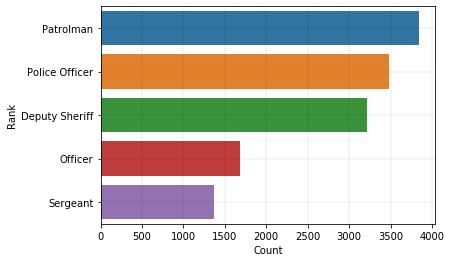

In [410]:
# plt.figure(figsize=(10, 10))
ax = sns.barplot(x=df_rank_top5['Count'], y=df_rank_top5['Rank'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

In [411]:
top_rank_death = df_rank_top5.iloc[0, 0]
df_top_rank_death = df_root[df_root['Rank']==top_rank_death]
df_top_rank_death_rsn = df_top_rank_death.groupby('Cause_of_Death').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
# df_top_rank_death_rsn

<function matplotlib.pyplot.show(*args, **kw)>

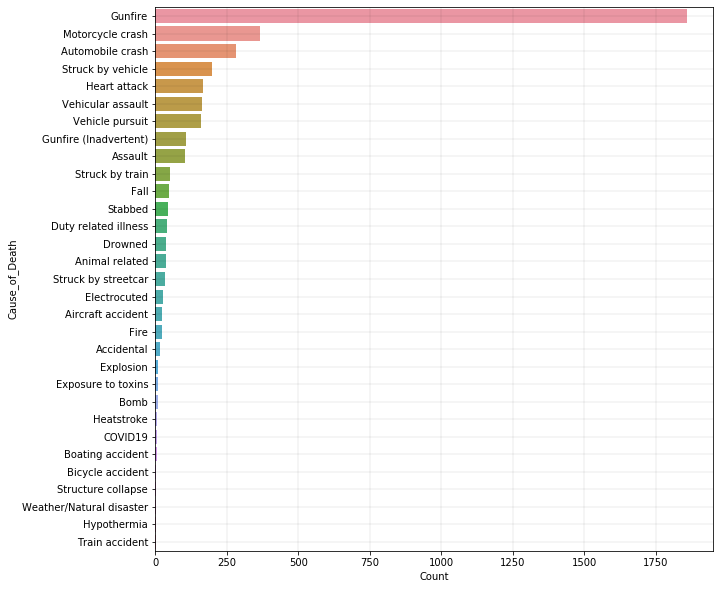

In [412]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=df_top_rank_death_rsn['Count'], y=df_top_rank_death_rsn['Cause_of_Death'])
ax.grid(b=True, which='Major', color='black', linewidth=0.075)
ax.grid(b=True, which='Minor', color='black', linewidth=0.075)
plt.show

##### Patrolmen suffered the most deaths and majorly due to gunfire incidents.

In [413]:
# df_year_timeseries = df_root.groupby('Year').size().reset_index().rename(columns={0: 'Count'})
# df_year_timeseries
x = df_root[df_root['Year']==2021]
# x

<function matplotlib.pyplot.show(*args, **kw)>

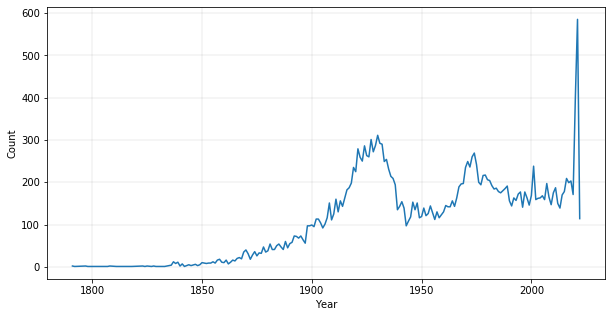

In [414]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=df_year_timeseries['Year'], y=df_year_timeseries['Count'])
ax.grid(b=True, which="Major", color='black', linewidth=0.075)
ax.grid(b=True, which="Minor", color='black', linewidth=0.075)
plt.show

In [415]:
df_yty_size = df_root[df_root['Year']!=2022]
df_yty_size = df_yty_size.groupby('Year').size()
# df_yty_size

In [416]:
df_yty = df_root[df_root['Year']!=2022]
df_yty_1 = df_yty.groupby('Year')
df_yty_c1 = df_yty_1.size().reset_index().rename(columns={0: 'Count'})
# df_yty_c1

In [417]:
df_yty_c2
df_yty_c2['Count'] = df_yty_c1['Count'].shift(1).fillna(0).astype(int)
# df_yty_c2

In [418]:
df_yty_diff['yty'] = (df_yty_c1['Count'])-(df_yty_c2['Count'])
# df_yty_diff

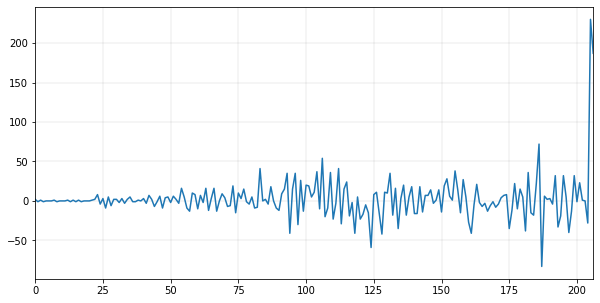

In [419]:
plt.figure(figsize=(10, 5))
ax = df_yty_diff['yty'].plot()
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

In [420]:
df_US = df_main[df_main['State']=='United States']

In [421]:
df_US_1 = df_US.groupby('Cause_of_Death').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
(df_US_1.iloc[0,1]/df_US_1['Count'].sum())*100

48.47715736040609

<function matplotlib.pyplot.show(*args, **kw)>

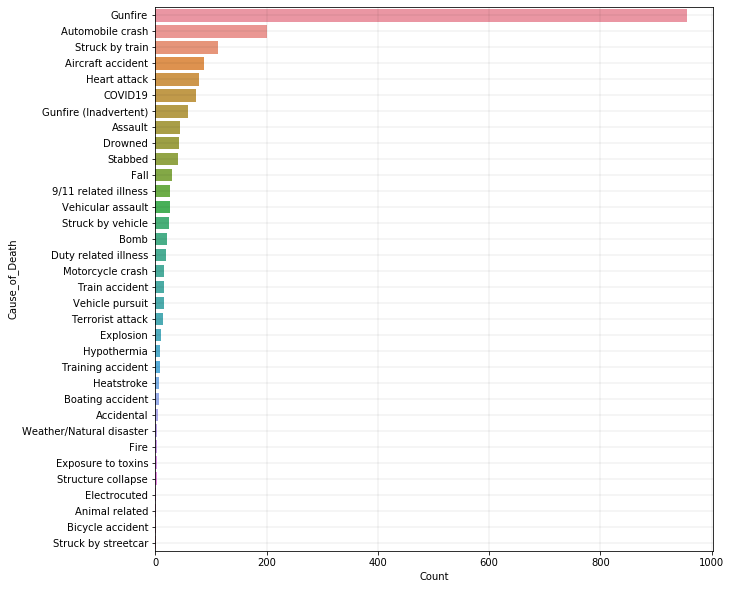

In [422]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=df_US_1['Count'], y=df_US_1['Cause_of_Death'])
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

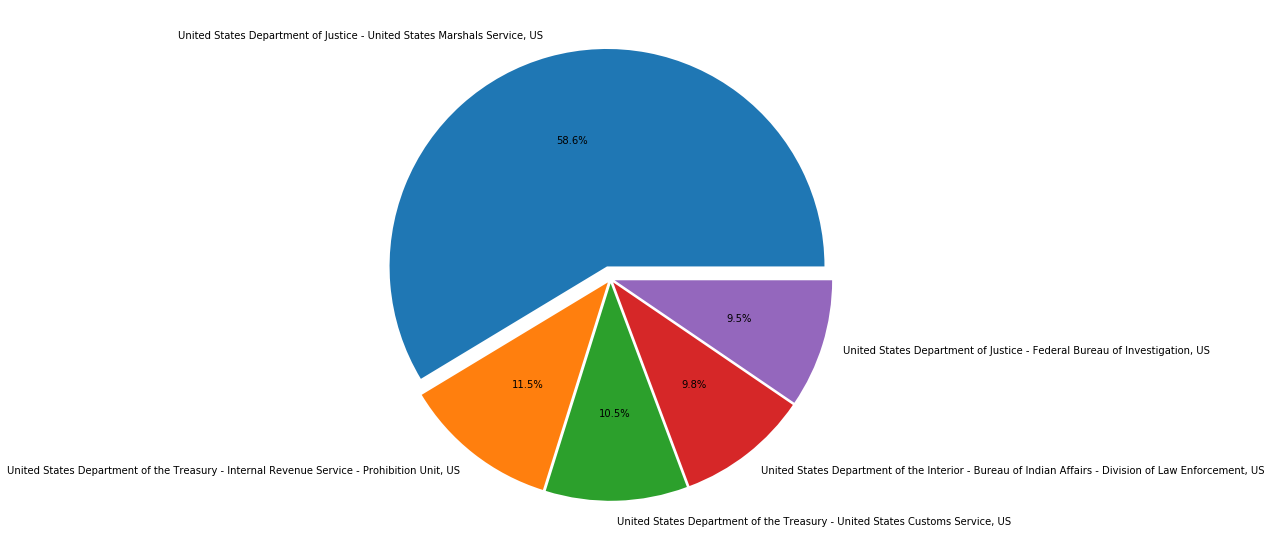

In [423]:
top_cause = df_US_1.iloc[0,0]
df_gunfire = df_US[df_US['Cause_of_Death']== top_cause]
df_gunfire_g = df_gunfire.groupby('Department').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'})
df_gunfire_g_top5 = df_gunfire_g.head()

ln = len(df_gunfire_g_top5)
explode = [0.06 if i == 0 else 0.02 for i in range(ln)]
plt.figure(figsize=(10,10))
plt.pie(x=df_gunfire_g_top5['Count'], labels=df_gunfire_g_top5['Department'], explode=explode, autopct='%0.1f%%')
plt.show

In [424]:
df_US_dept = df_US.groupby('Department').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
df_US_dept_top5 = df_US_dept.head()

<function matplotlib.pyplot.show(*args, **kw)>

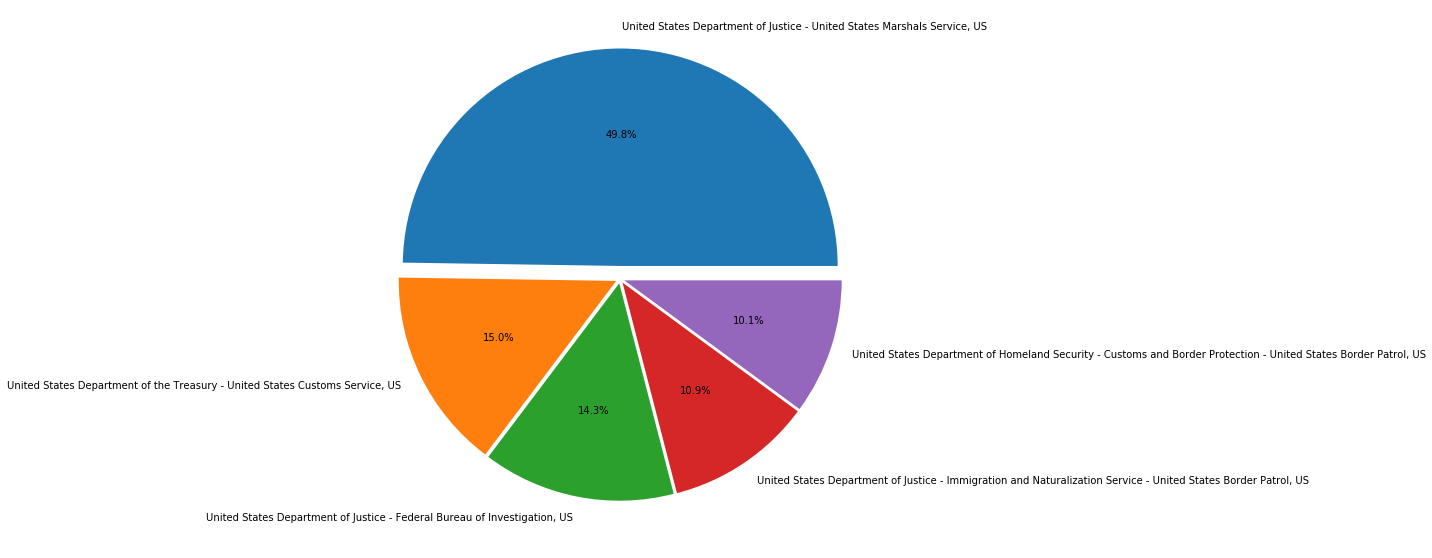

In [425]:
ln = len(df_US_dept_top5)
explode = [0.06 if i == 0 else 0.02 for i in range(ln)]
plt.figure(figsize=(10,10))
plt.pie(x=df_US_dept_top5['Count'], labels=df_US_dept_top5['Department'], explode=explode, autopct='%0.1f%%')
plt.show

##### 49.8% deaths occured in the US Marshals Service

In [426]:
df_US_911 = df_US[(df_US['Year']==2001) & (df_US['Cause_of_Death']=='Terrorist attack')]
df_US_911_s = df_US_911.groupby('Cause_of_Death').size()
df_US_911_s

Cause_of_Death
Terrorist attack    3
dtype: int64

In [427]:
df_k9 = df_main[df_main['K9_Unit']==1]
df_k9_s = df_k9.groupby('Cause_of_Death').size().sort_values(ascending=False).reset_index().rename(columns={0: 'Count'})
# df_k9_s

<function matplotlib.pyplot.show(*args, **kw)>

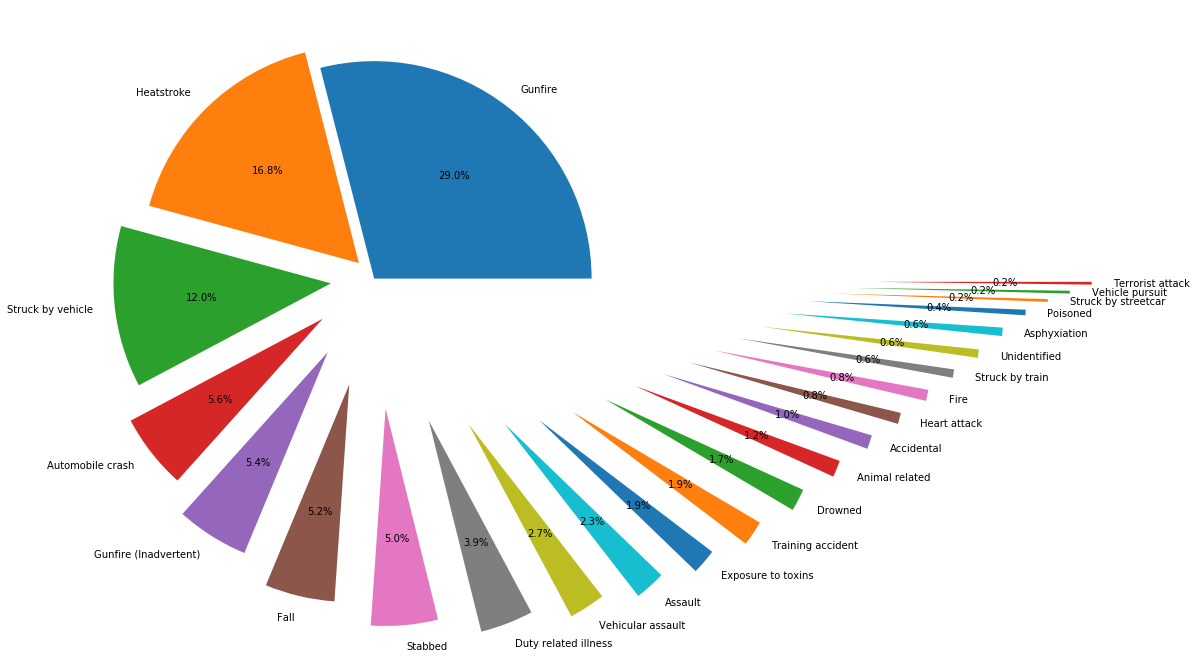

In [428]:
ln = len(df_k9_s)
explode = [i*0.1 for i in range(ln)]
plt.figure(figsize=(10,10))
plt.pie(x=df_k9_s['Count'], labels=df_k9_s['Cause_of_Death'], explode=explode, autopct='%0.1f%%')
plt.show

##### 29% of the K9s suffered death due to gunfire incidents.
##### It is interesting to note that almost 17% of the K9s suffered death due to heatstroke.

In [429]:
df_K9_heat = df_k9[df_k9['Cause_of_Death']=='Heatstroke']
df_K9_heat_yr = df_K9_heat.groupby('Year').size().reset_index().rename(columns={0: 'Count'})
# df_K9_heat_yr

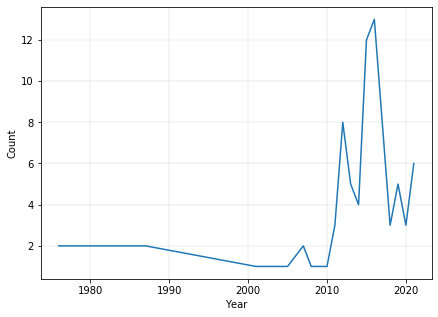

In [430]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(x=df_K9_heat_yr['Year'], y=df_K9_heat_yr['Count'])
ax.grid(b=True, which='Major', color='black', linewidth=0.075)
ax.grid(b=True, which='Minor', color='black', linewidth=0.075)

In [431]:
df_K9_death_Max = df_K9_heat_yr['Count'].max()
df_K9_death_Max_row = df_K9_heat_yr.iloc[df_K9_death_Max, 0]
df_K9_death_Max2 = df_K9_heat_yr['Count'].max()-1
df_K9_death_Max2_row = df_K9_heat_yr.iloc[df_K9_death_Max2, 0]
df_K9_death_Max_row, df_K9_death_Max2_row

(2016, 2015)

##### K9s suffered death the most due to heatstroke in 2015 and 2016, probably one of the hottest years

### Scope for Improvements:
##### More relationships and analysis could be explored. E.g.: Comparing max death count day to the average death count
##### Predictive Modeling of deaths to understand which day/month/dept/rank has the highest propensity for casualties.